In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
#import df
crypto_df = pd.read_csv('Resources/crypto_data.csv')
crypto_df.head()
#crypto_df.count()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#keep only rows where trading is true
trading_only_df = crypto_df.loc[(crypto_df['IsTrading'] == True)]
trading_only_df.count()

Unnamed: 0         1144
CoinName           1144
Algorithm          1144
IsTrading          1144
ProofType          1144
TotalCoinsMined     685
TotalCoinSupply    1144
dtype: int64

In [4]:
#drop isTrading column
trading_dropped_df = trading_only_df.drop(columns='IsTrading')
trading_dropped_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
#check for nulls
trading_dropped_df.isna().any()

Unnamed: 0         False
CoinName           False
Algorithm          False
ProofType          False
TotalCoinsMined     True
TotalCoinSupply    False
dtype: bool

In [6]:
#drop nulls
dropped_nulls_df = trading_dropped_df.dropna()

In [7]:
#check that nulls are gone
dropped_nulls_df.isna().any()
dropped_nulls_df.count()

Unnamed: 0         685
CoinName           685
Algorithm          685
ProofType          685
TotalCoinsMined    685
TotalCoinSupply    685
dtype: int64

In [8]:
#filter coins mined
coins_mined_df = dropped_nulls_df.loc[(crypto_df['TotalCoinsMined'] > 0)]
coins_mined_df.count()

Unnamed: 0         532
CoinName           532
Algorithm          532
ProofType          532
TotalCoinsMined    532
TotalCoinSupply    532
dtype: int64

In [9]:
#drop coin name and Unnamed: 0
final_df = coins_mined_df.drop(columns='CoinName')
final_df = final_df.drop(columns='Unnamed: 0')
final_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [10]:
X = pd.get_dummies(final_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

In [12]:
pca = PCA(n_components=4)

crypto_pcal = pca.fit_transform(crypto_scaled)

In [13]:
df_crypto_pcal = pd.DataFrame(data=crypto_pcal,
                             columns=["PC 1", "PC 2", "PC 3", "PC 4"])
df_crypto_pcal.head()

,PC 1,PC 2,PC 3,PC 4
0,-0.333104,1.099410,-0.503305,0.013975
1,-0.316436,1.099663,-0.503665,0.014060
2,2.301414,1.739398,-0.570380,-0.005716
3,-0.143663,-1.340588,0.130264,0.032893
4,-0.159308,-2.077431,0.335926,-0.003550


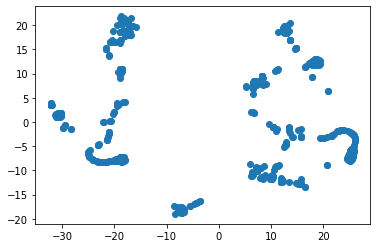

In [15]:
#Apply TSNE to further reduce dimensions
# Initialize t-SNE model
tsne = TSNE(learning_rate=80)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pcal)
tsne_features.shape

# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [ ]:
#Applying K-means elbow plot to find best number of clusters
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()